In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/data_btp.csv')

In [ ]:
 df = df.sample(frac=1)

In [ ]:
df.to_csv("data.csv")

In [ ]:
df.rename(columns = {'Lambda/L':'lamdabyl'}, inplace = True)


In [ ]:
df.rename(columns = {'H/Lamda':'hbylamda'}, inplace = True)

In [ ]:
df.head()

,Unnamed: 0,F_n,lamdabyl,hbylamda,Beta,P_max
113,113,0.10,0.8,0.020000,29.095,8819.86719
775,775,0.20,1.0,0.066667,1.404,10062.94340
160,160,0.10,1.0,0.040000,49.051,8337.84473
482,482,0.15,0.8,0.010000,29.095,8819.86719
392,392,0.10,2.0,0.066667,29.095,8819.86719


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV

In [ ]:
df = pd.DataFrame({'lamdabyl': df["lamdabyl"],
                   'Fn': df["F_n"],
                   'hbylamda':df["hbylamda"],
                   'beta':df["Beta"],
                   'max pressure':df["P_max"]
                   })

In [ ]:
df

,lamdabyl,Fn,hbylamda,beta,max pressure
113,0.80,0.10,0.020000,29.095,8819.86719
775,1.00,0.20,0.066667,1.404,10062.94340
160,1.00,0.10,0.040000,49.051,8337.84473
482,0.80,0.15,0.010000,29.095,8819.86719
392,2.00,0.10,0.066667,29.095,8819.86719
...,...,...,...,...,...
496,0.80,0.15,0.033333,1.404,10062.94340
545,1.00,0.15,0.013333,29.095,8819.86719
664,2.00,0.15,0.010000,49.051,8337.84473
757,0.80,0.20,0.013333,1.404,10062.94340


In [ ]:
for i in range(len(df)):
  df["max pressure"].iloc[i]= df["max pressure"].iloc[i]/(1025*9.81*0.3354)

In [ ]:
max_pressure= df["max pressure"]

In [ ]:
df

,lamdabyl,Fn,hbylamda,beta,max pressure
113,0.80,0.10,0.020000,29.095,2.615207
775,1.00,0.20,0.066667,1.404,2.983796
160,1.00,0.10,0.040000,49.051,2.472281
482,0.80,0.15,0.010000,29.095,2.615207
392,2.00,0.10,0.066667,29.095,2.615207
...,...,...,...,...,...
496,0.80,0.15,0.033333,1.404,2.983796
545,1.00,0.15,0.013333,29.095,2.615207
664,2.00,0.15,0.010000,49.051,2.472281
757,0.80,0.20,0.013333,1.404,2.983796


**ATTRIBUTE ANALYSIS**

In [ ]:
from scipy import stats
a=stats.ttest_ind(df['beta'],df['max pressure'])[1]
b=stats.ttest_ind(df['hbylamda'],df['max pressure'])[1]
c=stats.ttest_ind(df['Fn'],df['max pressure'])[1]
d=stats.ttest_ind(df['lamdabyl'],df['max pressure'])[1]

In [ ]:
dict_a = {
   'beta_max pressure,':[a], 
   'hbylamda_max pressure': [b], 
   'Fn_max pressure':[c],
   'lamdabyl_max pressure':[d]
}

In [ ]:
df_pvalue = pd.DataFrame.from_dict(dict_a, orient ='index')
df_pvalue.columns = ['P value']
df_pvalue

,P value
"beta_max pressure,",9.867912e-205
hbylamda_max pressure,0.000000e+00
Fn_max pressure,0.000000e+00
lamdabyl_max pressure,0.000000e+00


In [ ]:
e=df['max pressure'].corr(df['beta'])
f=df['max pressure'].corr(df['hbylamda'])
g=df['max pressure'].corr(df['Fn'])
h=df['max pressure'].corr(df['lamdabyl'])

In [ ]:
dict_b = {
   'beta_max pressure,':[e], 
   'hbylamda_max pressure': [f], 
   'Fn_max pressure':[g],
   'lamdabyl_max pressure':[h]
}

In [ ]:
df_corre = pd.DataFrame.from_dict(dict_b, orient ='index')
# df.corr(method ='pearson')
df_corre.columns = ['Pearson Correlation']
df_corre

,Pearson Correlation
"beta_max pressure,",-9.678683e-01
hbylamda_max pressure,-7.654775e-18
Fn_max pressure,2.174168e-18
lamdabyl_max pressure,-3.887001e-17


In [ ]:
max_pressure

113    2.615207
775    2.983796
160    2.472281
482    2.615207
392    2.615207
         ...   
496    2.983796
545    2.615207
664    2.472281
757    2.983796
884    2.887573
Name: max pressure, Length: 1098, dtype: float64

**TRAIN TEST SPLIT**

In [ ]:
data_x = df.drop(["max pressure"],axis=1)

In [ ]:
data_x =data_x.to_numpy()

In [ ]:
data_y=max_pressure.to_numpy()

In [ ]:
data_train=data_x
data_y_train=data_y

In [ ]:
data_train = data_x[:-20]
data_test = data_x[-20:]

In [ ]:
data_y_train =data_y[:-20]
data_y_test = data_y[-20:]

**VISUALIZATION**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

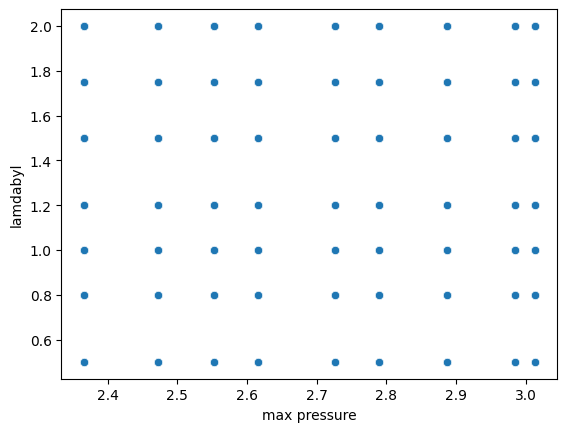

In [ ]:
sns.scatterplot(x='max pressure',
                y='lamdabyl', data=df)
plt.savefig('scatter_plot1.png')

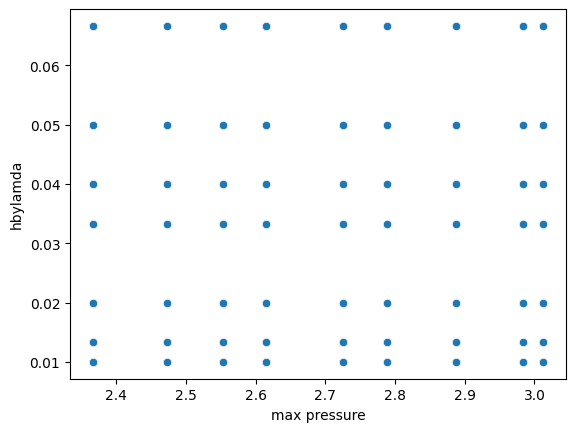

In [ ]:
sns.scatterplot(x='max pressure',
                y='hbylamda', data=df)
plt.savefig('scatter_plot2.png')

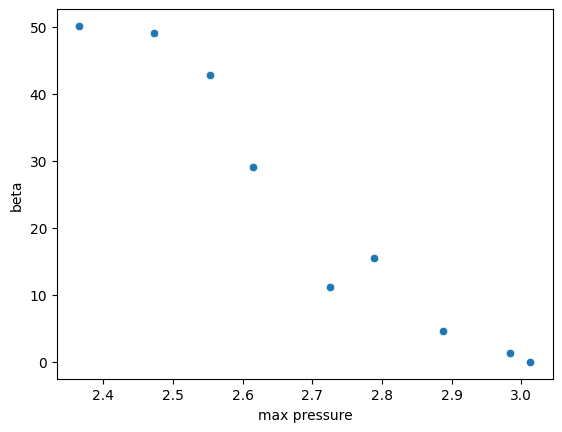

In [ ]:
sns.scatterplot(x='max pressure',
                y='beta', data=df)
plt.savefig('scatter_plot3.png')

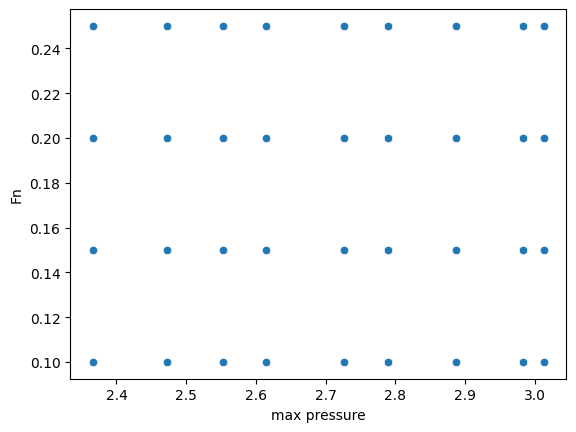

In [ ]:
sns.scatterplot(x='max pressure',
                y='Fn', data=df)
plt.savefig('scatter_plot4.png')

**odinary least squares for all 4 attributes**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(data_train, data_y_train)

LinearRegression()

In [ ]:
data_y_pred = regr.predict(data_test)

In [ ]:
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(data_y_test, data_y_pred))
score_plr=mean_squared_error(data_y_test, data_y_pred)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" % r2_score(data_y_test, data_y_pred))


Coefficients: 
 [ 0.00014146  0.00085251  0.00210528 -0.01070115]
Mean squared error: 0.001618
Coefficient of determination: 0.971232


In [ ]:
RMSE_linear = mean_squared_error(data_y_test, data_y_pred)
r2_ordinary = r2_score(data_y_test, data_y_pred)

lasso

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [ ]:
lasso_reg = LassoCV().fit(data_train, data_y_train)

In [ ]:
data_y_predlasso=lasso_reg.predict(data_test)

In [ ]:
print("Coefficients: \n", lasso_reg.coef_)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(data_y_test, data_y_predlasso))
score_plrl=mean_squared_error(data_y_test, data_y_predlasso)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" % r2_score(data_y_test, data_y_predlasso))

Coefficients: 
 [ 0.          0.          0.         -0.01069048]
Mean squared error: 0.001622
Coefficient of determination: 0.971159


In [ ]:
RMSE_lasso = mean_squared_error(data_y_test, data_y_predlasso)
r2_lasso = r2_score(data_y_test, data_y_predlasso)

ridge

In [ ]:
ridge_reg = RidgeCV().fit(data_train, data_y_train)

In [ ]:
data_y_predridge=ridge_reg.predict(data_test)

In [ ]:
print("Coefficients: \n", ridge_reg.coef_)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(data_y_test, data_y_predridge))
score_plrr=mean_squared_error(data_y_test, data_y_predridge)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" % r2_score(data_y_test, data_y_predridge))

Coefficients: 
 [ 1.23019964e-04  1.86723515e-04  9.27662347e-05 -1.07008892e-02]
Mean squared error: 0.001618
Coefficient of determination: 0.971237


In [ ]:
RMSE_ridge= mean_squared_error(data_y_test, data_y_predridge)
r2_ridge = r2_score(data_y_test, data_y_predridge)

BayesianRidge


In [ ]:
clf = linear_model.BayesianRidge()

In [ ]:
clf.fit(data_train, data_y_train)

BayesianRidge()

In [ ]:
data_y_bay=clf.predict(data_test)

In [ ]:
print("Coefficients: \n", clf.coef_)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(data_y_test, data_y_bay))
score_plrr=mean_squared_error(data_y_test, data_y_bay)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" % r2_score(data_y_test, data_y_bay))

Coefficients: 
 [ 1.05167630e-04  4.55715514e-05  1.96775755e-05 -1.06998704e-02]
Mean squared error: 0.001618
Coefficient of determination: 0.971230


In [ ]:
RMSE_Bayesian= mean_squared_error(data_y_test, data_y_bay)
r2_Bayesian = r2_score(data_y_test, data_y_bay)

**PCA**

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [ ]:
X_train_scaled = scale(data_train) 
X_test_scaled = scale(data_test)

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, data_y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, data_y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(data_y_test, lin_reg.predict(X_test_scaled))

# Lasso Regression
lasso_reg = LassoCV().fit(X_train_scaled, data_y_train)
lasso_score_train = -1 * cross_val_score(lasso_reg, X_train_scaled, data_y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lasso_score_test = mean_squared_error(data_y_test, lasso_reg.predict(X_test_scaled))

# Ridge Regression
ridge_reg = RidgeCV().fit(X_train_scaled, data_y_train)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_train_scaled, data_y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
ridge_score_test = mean_squared_error(data_y_test, ridge_reg.predict(X_test_scaled))



In [ ]:
print("Mean squared error: %f" % lr_score_test)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" %  r2_score(data_y_test, lin_reg.predict(X_test_scaled)))
r2_crosslinear = r2_score(data_y_test, lin_reg.predict(X_test_scaled))

Mean squared error: 0.003331
Coefficient of determination: 0.940773


In [ ]:
print("Mean squared error: %f" % lasso_score_test)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" %  r2_score(data_y_test, lasso_reg.predict(X_test_scaled)))
r2_crosslasso = r2_score(data_y_test, lasso_reg.predict(X_test_scaled))

Mean squared error: 0.003417
Coefficient of determination: 0.939254


In [ ]:
print("Mean squared error: %f" % ridge_score_test)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" %  r2_score(data_y_test, ridge_reg.predict(X_test_scaled)))
r2_crossridge =  r2_score(data_y_test, ridge_reg.predict(X_test_scaled))

Mean squared error: 0.003332
Coefficient of determination: 0.940755


In [ ]:
lasso_score_test

0.003416642322913026

In [ ]:
ridge_score_test

0.00333224101532341

In [ ]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).to_csv("pca.csv")


In [ ]:
pca.explained_variance_ratio_

array([0.30124808, 0.2503152 , 0.24854276, 0.19989397])

In [ ]:
import matplotlib.pyplot as plt

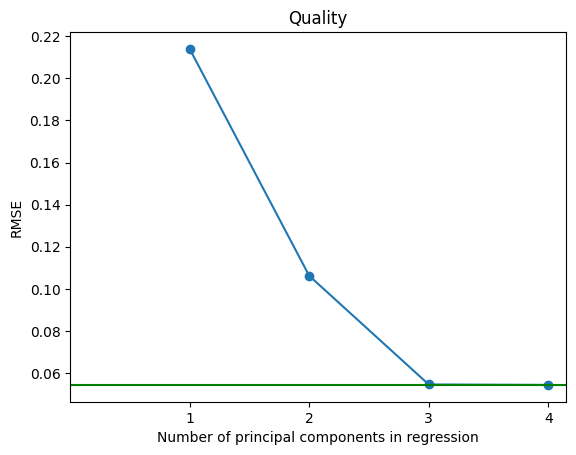

In [ ]:
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      data_y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');
plt.savefig('plot5.png')

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 3

# Train model with first 9 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], data_y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       data_y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], data_y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(data_y_test, preds)

In [ ]:
print("Mean squared error: %f" % pcr_score_test)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %f" %  r2_score(data_y_test, preds))
r2_pcr = r2_score(data_y_test, preds)

Mean squared error: 0.003479
Coefficient of determination: 0.938141


In [ ]:
dict_c = {
   'Linear Regression':[score_plr,r2_ordinary], 
   'Lasso Regression':[score_plrl,r2_lasso],
   'Ridge Regression':[score_plrr,r2_ridge],
   'Cross_Validation Regression': [lr_score_test,r2_crosslinear], 
   'Cross_Validation Lasso_Regression':[lasso_score_test,r2_crosslasso],
   'Cross_Validation Ridge_Regression':[ridge_score_test,r2_crossridge],
   'Principal Component Regression':[pcr_score_test,r2_pcr],
   'DecisionTreeRegressor_Depth2':[decision_score_test,r2_depth2],
   'DecisionTreeRegressor_Depth5':[decision_score_test_2,r2_depth3],
   'RandomForestRegressor':[rn_score_test,r2_rn],
   'RandomForestRegressor_Hyperparameter Tuning':[rn_score_test_hy,r2_hy]

}

In [ ]:
df_com = pd.DataFrame.from_dict(dict_c, orient ='index')

In [ ]:
df_com.columns =['RMSE','R2']

In [ ]:
data_train.shape

(1744, 4)

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset

X = data_train 
y = data_y_train


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = data_test
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
decision_score_test = mean_squared_error(data_y_test, y_1)
decision_score_test_2 = mean_squared_error(data_y_test, y_2)
r2_depth2= r2_score(data_y_test, y_1)
r2_depth3 = r2_score(data_y_test, y_2)
decision_score_test,decision_score_test_2,r2_score(data_y_test, y_1),r2_score(data_y_test, y_2)

(0.0025468912215970982,
 4.2832254590588777e-05,
 0.9547177512680807,
 0.9992384673559385)

In [ ]:
df_com

,RMSE,R2
Linear Regression,0.001618,0.971232
Lasso Regression,0.001622,0.971159
Ridge Regression,0.001618,0.971237
Cross_Validation Regression,0.003331,0.940773
Cross_Validation Lasso_Regression,0.003417,0.939254
Cross_Validation Ridge_Regression,0.003332,0.940755
Principal Component Regression,0.003479,0.938141
DecisionTreeRegressor_Depth2,0.002547,0.954718
DecisionTreeRegressor_Depth5,0.000043,0.999238
RandomForestRegressor,0.002547,0.999239


In [ ]:
df_com.to_csv("result.csv")

In [ ]:
X.shape

(1078, 4)

In [ ]:
y.shape

(1078,)

In [ ]:
data_train[:,:1].shape

(1078, 1)

In [ ]:
data_y_train.shape

(1078,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=1, shuffle=False)
regr = RandomForestRegressor(max_depth=3, random_state=1)
X = data_train 
y = data_y_train
regr.fit(X, y)

y1=regr.predict(X_test)

rn_score_test = mean_squared_error(data_y_test, y_1)
r2_rn= r2_score(data_y_test, y1)
rn_score_test,r2_score(data_y_test, y1)

(0.0025468912215970982, 0.999238798312839)

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [ ]:
param_dist = {
    'n_estimators': Integer(1, 500),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': Real(0.1, 1.0),
    'bootstrap': [True, False]
}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
bayes_search = BayesSearchCV(rf, param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

In [ ]:
X = data_train 
y = data_y_train

In [ ]:
bayes_search.fit(X, y)

BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=10, n_jobs=-1,
              random_state=42,
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=500, prior='uniform', transform='normalize')})

In [ ]:
print("Best hyperparameters: ", bayes_search.best_params_)

Best hyperparameters:  OrderedDict([('bootstrap', False), ('max_depth', 37), ('max_features', 0.9395811989630505), ('min_samples_leaf', 2), ('min_samples_split', 7), ('n_estimators', 208)])


In [ ]:
rf_best = RandomForestRegressor(**bayes_search.best_params_)

# Fit the new Random Forest Regressor object on the training data
rf_best.fit(X, y)

# Evaluate the performance of the new Random Forest Regressor object on the testing data
y_pred = rf_best.predict(X_test)

In [ ]:
rn_score_test_hy = mean_squared_error(data_y_test, y_pred)
r2_hy = r2_score(data_y_test, y_pred)
rn_score_test_hy,r2_score(data_y_test, y_pred)

(1.151321636302004e-05, 0.9997953016906911)

In [ ]:
data_test

array([[1.50000000e+00, 2.00000000e-01, 6.66666667e-02, 4.90510000e+01],
       [1.00000000e+00, 2.50000000e-01, 1.00000000e-02, 4.56400000e+00],
       [1.20000000e+00, 1.00000000e-01, 1.00000000e-02, 5.01600000e+01],
       [1.20000000e+00, 1.00000000e-01, 3.33333333e-02, 1.55830000e+01],
       [1.75000000e+00, 1.00000000e-01, 3.33333333e-02, 1.40400000e+00],
       [1.20000000e+00, 1.50000000e-01, 3.33333333e-02, 5.01600000e+01],
       [1.75000000e+00, 1.00000000e-01, 4.00000000e-02, 4.90510000e+01],
       [1.00000000e+00, 2.50000000e-01, 6.66666667e-02, 2.90950000e+01],
       [1.75000000e+00, 2.00000000e-01, 1.00000000e-02, 4.27820000e+01],
       [2.00000000e+00, 2.00000000e-01, 6.66666667e-02, 5.01600000e+01],
       [1.75000000e+00, 2.00000000e-01, 1.33333333e-02, 4.56400000e+00],
       [2.00000000e+00, 1.00000000e-01, 2.00000000e-02, 5.01600000e+01],
       [1.00000000e+00, 1.00000000e-01, 4.00000000e-02, 2.90950000e+01],
       [5.00000000e-01, 1.00000000e-01, 5.00000000e

In [ ]:
data_y_test

array([2.47228123, 2.8875732 , 2.36587005, 2.78905668, 2.9837958 ,
       2.36587005, 2.47228123, 2.61520727, 2.55272232, 2.36587005,
       2.8875732 , 2.36587005, 2.61520727, 3.01294211, 2.8875732 ,
       2.9837958 , 2.61520727, 2.47228123, 2.9837958 , 2.8875732 ])

In [ ]:
y_pred

array([2.47197428, 2.88799933, 2.36655217, 2.78905668, 2.98317106,
       2.36648396, 2.47159911, 2.61440618, 2.55364357, 2.37927253,
       2.89005084, 2.36881977, 2.61367742, 3.00920643, 2.88842547,
       2.98385365, 2.61502702, 2.46859777, 2.98385365, 2.88887896])

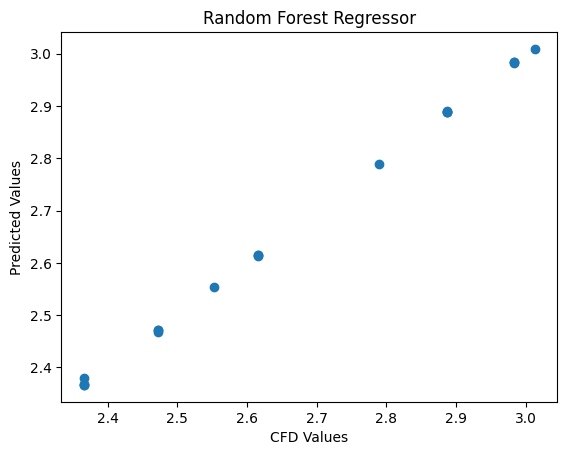

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values of the testing data
plt.scatter(data_y_test, y_pred)
plt.xlabel('CFD Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor')
plt.show()

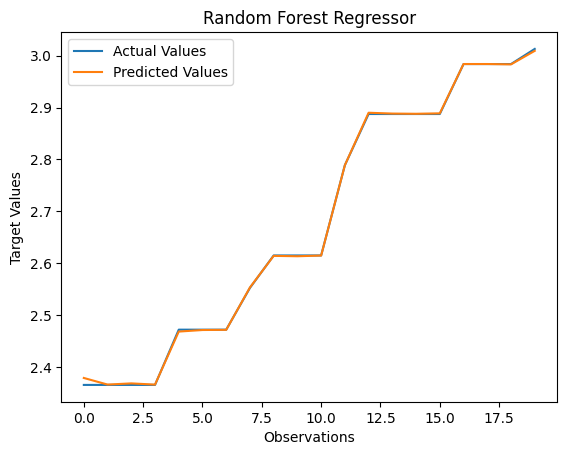

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the actual values and predicted values by ascending order of the actual values
idx = np.argsort(data_y_test)
y_test_sorted = data_y_test[idx]
y_pred_sorted = y_pred[idx]

# Plot the actual values and predicted values as lines
plt.plot(y_test_sorted, label='Actual Values')
plt.plot(y_pred_sorted, label='Predicted Values')
plt.xlabel('Observations')
plt.ylabel('Target Values')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()






In [ ]:
df_comp = pd.read_csv('/content/testing_data.csv')

In [ ]:
df_comp= df_comp.to_numpy()

In [ ]:
df_comp

array([[1.5000e-01, 1.0000e+00, 2.0000e-02, 0.0000e+00],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 1.4040e+00],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 4.5640e+00],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 1.1132e+01],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 1.5583e+01],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 2.9095e+01],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 4.2782e+01],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 4.9051e+01],
       [1.5000e-01, 1.0000e+00, 2.0000e-02, 5.0160e+01],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 0.0000e+00],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 1.4040e+00],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 4.5640e+00],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 1.1132e+01],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 1.5583e+01],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 2.9095e+01],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 4.2782e+01],
       [2.5000e-01, 1.0000e+00, 2.0000e-02, 4.9051e+01],
       [2.5000e-01, 1.0000e+00,

In [ ]:
y_pred_fromcf = rf_best.predict(df_comp)

In [ ]:
y_pred_fromcfd *= (1025*9.81*0.3354)

In [ ]:
y_pred_fromcfd

array([10153.45803774, 10057.99672235,  9739.25107985,  9216.30712051,
        9394.70384955,  8816.18052572,  8607.47437899,  8327.57805332,
        7994.58346197, 10153.45803774, 10057.99672235,  9739.25107985,
        9216.30712051,  9394.70384955,  8816.18052572,  8607.47437899,
        8327.57805332,  7994.58346197, 10153.45803774, 10057.99672235,
        9739.25107985,  9216.30712051,  9394.70384955,  8816.18052572,
        8607.47437899,  8327.57805332,  7994.58346197])

In [ ]:
df_cfd = pd.DataFrame(y_pred_fromcfd)

In [ ]:
df_cfd

,0
0,10153.458038
1,10057.996722
2,9739.251080
3,9216.307121
4,9394.703850
5,8816.180526
6,8607.474379
7,8327.578053
8,7994.583462
9,10153.458038
